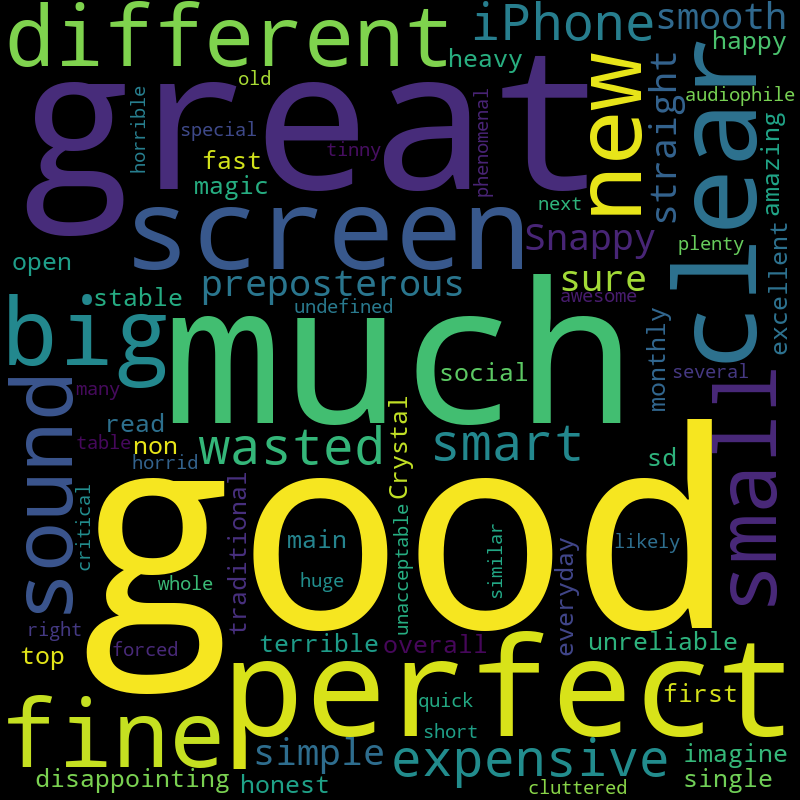

In [2]:
from OnlineProductReviewer import Product
x = Product("B078HSFRGF")
x.getCloud()

In [ ]:
from Helper import *
string = "B23452345345"
startsWith(string, "B")

In [ ]:
from bs4 import BeautifulSoup
import requests
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.90 Safari/537.36'}
url = "https://www.amazon.in/product-reviews/{}/reviewerType=all_reviews/ref=cm_cr_arp_d_paging_btm_next_2?sortBy=recent&pageNumber=1".format("B0093H048Y")
print(url)
sess = requests.Session()
sess.headers['User-Agent'] = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.90 Safari/537.36"
res = sess.get(url)
data = res.content
soup = BeautifulSoup(data, 'html.parser')
count_string = soup.find_all('div', {'data-hook': 'cr-filter-info-review-rating-count'})
print(count_string)
int(count_string[0].find('span').string.strip().split('|')[-1].split('global')[0].strip().replace(',',""))
# reviewCount = int(soup.find_all('div', {'data-hook': 'cr-filter-info-review-rating-count'})[0].string.replace(",", ""))

In [ ]:
from bs4 import BeautifulSoup
import requests
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.90 Safari/537.36'}
url = "https://www.amazon.in/product-reviews/{}/reviewerType=all_reviews/ref=cm_cr_arp_d_paging_btm_next_2?sortBy=recent&pageNumber={}".format("B01GTUDXMG",'4')
print(url)
sess = requests.Session()
sess.headers['User-Agent'] = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.90 Safari/537.36"
res = sess.get(url)
data = res.content
soup = BeautifulSoup(data, 'html.parser')
count_string = soup.find_all('span', {'class': 'a-size-base review-text review-text-content'})
[c.find('span').string.strip() for c in count_string]

In [ ]:
from nltk.corpus import words
from collections import Counter

corpus = Counter(words.words())
from symspellpy import SymSpell

sym = SymSpell()

sym.create_dictionary(corpus)
sym.build_vocab(dictionary=corpus, file_name="spell_check.txt")

In [ ]:
from textblob import TextBlob
t = TextBlob("For the price, it's a well made. after trying some cheaper but poorly made multimeter, the Mastech Multimeter is quite an upgrade. For common testing around the house and for DIY its more than enough . A carrying case would have been great for lagging this thing around.")
[word.strip() for word, pos in t.tags if pos == "JJ"]

In [ ]:
from OnlineProductReviewer import Review
Review.GetReviews("B0093H048Y",2)

In [ ]:
from OPRExceptions import *
from Helper import *
import sys

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from bs4 import BeautifulSoup
import multiprocessing
from joblib import Parallel, delayed
from functools import partial
import time
import requests
import timeit

from joblib.externals.loky import set_loky_pickler
from joblib import parallel_backend
from joblib import Parallel, delayed
from joblib import wrap_non_picklable_objects


sys.setrecursionlimit(10000)

def GetReview(productCode, pageNumber):
        reviews = []

        headers = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.90 Safari/537.36'
        url = "https://www.amazon.in/product-reviews/{}/reviewerType=all_reviews/ref=cm_cr_arp_d_paging_btm_next_2?sortBy=recent&pageNumber={}".format(
            productCode, pageNumber)
        retryCount = 0
        while retryCount < getValueOrDefault("Requests", "RetryCount", 5):
            try:
                session = requests.Session()
                session.headers['User-Agent'] = headers
                soup = BeautifulSoup(session.get(
                    url).content, 'html.parser')
                commentSpans = soup.find_all(
                    'span', {'class': 'a-size-base review-text review-text-content'})
                for commentSpan in commentSpans:
                    comment = commentSpan.find('span').string
                    if isNotBlank(comment):
                        reviews.append(comment)
                if isEmpty(commentSpans):
                    raise ReviewsUnavailableException
                else:
                    break
            except ReviewsUnavailableException:
                time.sleep(getValueOrDefault(
                    "Requests", "RetrySleepTimer", 5))
                retryCount += 1
        return reviews

page = 80
starttime = timeit.default_timer()
all_reviews = []
with multiprocessing.Pool(processes=40) as pool:
            pages = list(range(1, page + 1))
            func = partial(GetReview, "B0093H048Y")
            all_reviews.extend(pool.map(func, pages))
            
print("The time difference is :", timeit.default_timer() - starttime)
print(sys.getsizeof(all_reviews))
